In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math

def f(x,y):
    r = 3 * math.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    if r >= 1:
        return 0
    else:
        return math.exp((-1)/(1 - r**2))

In [138]:
def a(x,y):
    return (x**2 + y**2 + 1)/10

In [139]:
h = 1 / 20
n = 20
X = np.linspace(0,1,n)
Y = np.linspace(0,1,n)
A = np.zeros((len(X),len(Y)))
F = np.zeros((len(X),len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        A[i][j] = a(X[i],Y[j])
        F[i][j] = f(X[i],Y[j])

M = np.zeros((len(X)*len(X),len(Y)*len(X)))
s = np.zeros((len(X)*len(X)))
k = 0
#определяем матрицу
for i in range(n):
    for j in range(n):
        if i < n - 1 and j < n - 1 and i > 0 and j > 0:
            M[k][i*n + j] = A[i+1][j] + 2*A[i][j] + A[i][j + 1]
            M[k][(i+1)*n + j]  = -A[i+1][j]
            M[k][(i-1)*n + j]  = -A[i][j]
            M[k][i*n + (j+1)]  = -A[i][j+1]
            M[k][i*n + (j-1)]  = -A[i][j]
            s[k] = F[i][j]*h**2
        if i == n - 1 and j != n - 1 and j != 0:
            M[k][i*n + j] = A[0][j] + 2*A[i][j] + A[i][j + 1]
            M[k][(0)*n + j]  = -A[0][j]
            M[k][(i-1)*n + j]  = -A[i][j]
            M[k][i*n + (j+1)]  = -A[i][j+1]
            M[k][i*n + (j-1)]  = -A[i][j]
            s[k] = F[i][j]*h**2
        if j == n - 1 and i != n - 1 and i != 0:
            M[k][i*n + j] = A[i+1][j] + 2*A[i][j] + A[i][0]
            M[k][(i+1)*n + j]  = -A[i+1][j]
            M[k][(i-1)*n + j]  = -A[i][j]
            M[k][i*n + (0)]  = -A[i][0]
            M[k][i*n + (j-1)]  = -A[i][j]
            s[k] = F[i][j]*h**2
        if j == n - 1 and i == n - 1:
            M[k][i*n + j] = A[0][j] + 2*A[i][j] + A[i][0]
            M[k][(0)*n + j]  = -A[0][j]
            M[k][(i-1)*n + j]  = -A[i][j]
            M[k][i*n + (0)]  = -A[i][0]
            M[k][i*n + (j-1)]  = -A[i][j]
            s[k] = F[i][j]*h**2
        if j == 0 and i == 0:
            M[k][i*n + j] = A[i+1][j] + 2*A[i][j] + A[i][j + 1]
            M[k][(i+1)*n + j]  = -A[i+1][j]
            M[k][(n - 1)*n + j]  = -A[i][j]
            M[k][i*n + (j+1)]  = -A[i][j+1]
            M[k][i*n + (n - 1)]  = -A[i][j]
            s[k] = F[i][j]*h**2
        if j == 0 and i != 0 and i != n - 1:
            M[k][i*n + j] = A[i+1][j] + 2*A[i][j] + A[i][j + 1]
            M[k][(i+1)*n + j]  = -A[i+1][j]
            M[k][(i-1)*n + j]  = -A[i][j]
            M[k][i*n + (j+1)]  = -A[i][j+1]
            M[k][i*n + (n - 1)]  = -A[i][j]
            s[k] = F[i][j]*h**2
        if j != 0 and i == 0 and j != n - 1:
            M[k][i*n + j] = A[i+1][j] + 2*A[i][j] + A[i][j + 1]
            M[k][(i+1)*n + j]  = -A[i+1][j]
            M[k][( n - 1)*n + j]  = -A[i][j]
            M[k][i*n + (j+1)]  = -A[i][j+1]
            M[k][i*n + (j-1)]  = -A[i][j]
            s[k] = F[i][j]*h**2    
        k += 1

In [140]:
from scipy.sparse.linalg import cg
from scipy.sparse.linalg import LinearOperator
import inspect

#считаем неувязку на каждом шагу
def Report(xk):
    frame = inspect.currentframe().f_back
    residual = frame.f_locals['resid']
    r.append(residual)
    return

In [145]:
#считаем
u = np.zeros(n*n)
r=[]
x=cg(M, s, x0=u, tol=1e-6, maxiter=1E6, M=None, callback=Report, atol=None)

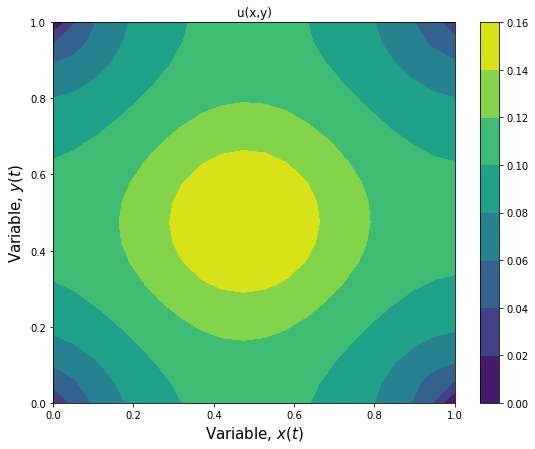

In [143]:
#cтроим график решения
sol = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        sol[i][j] = x[0][j + n*i]

f, (ax1) = plt.subplots(1, 1)
c1 = ax1.contourf(X, Y, sol, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('u(x,y)')
plt.xlabel("Variable, $x(t)$", fontsize=15)
plt.ylabel("Variable, $y(t)$", fontsize=15)

f.set_size_inches(9, 7)
plt.savefig('solution.png')
plt.show()

71


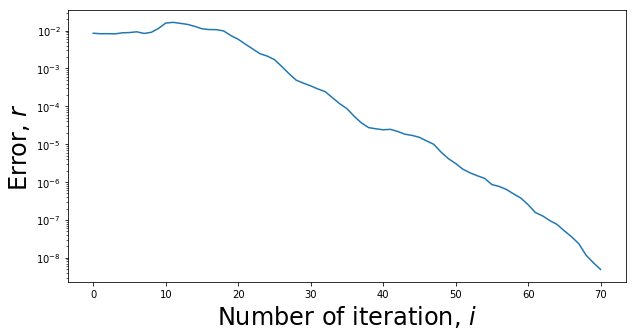

In [144]:
#строим график неувязки
print(len(r))
plt.figure(figsize=(10,5))
plt.plot(r)
plt.yscale('log')
plt.ylabel("Error, $r$", fontsize=24)
plt.xlabel("Number of iteration, $i$", fontsize=24)
plt.savefig('error.png')
plt.show()